<a href="https://colab.research.google.com/github/desaiankitb/pytorch-basics/blob/main/beginner/00_nn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

# What is `torch.nn` really?
PyTorch provides the elegantly designed modules and classes [`torch.nn`](https://pytorch.org/docs/stable/nn.html), [`torch.optim`](https://pytorch.org/docs/stable/optim.html), [`Dataset`](https://pytorch.org/docs/stable/data.html?highlight=dataset#torch.utils.data.Dataset), and [`DataLoader`](https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader) to help you create and train neural networks. In order to fully utilize their power and customize them for your problem, you need to really understand exactly what they are doing. To develop this understanding, we first train basic neural net on the MNIST data set without using any features from these models; we will initially only use the most basic PyTorch tensor functionality. Then, we will incrementally add one feature from `torch.nn`, `torch.optim`, `Dataset`, or `DataLoader` at a time, showing exactly what each piece does, and how it works to make the code either more concise, or more flexible. 

## MNIST datasetup 
We will use the classic [`MNIST`](http://deeplearning.net/data/mnist/) dataset, which consists of black-and-white images of hand-drawn digits (between 0 and 9). 

We will use [`pathlib`](https://docs.python.org/3/library/pathlib.html) for dealing with paths (part of the Python 3 standard lib), and will download the dataset using [`requests`](http://docs.python-requests.org/en/master/). We will only import modules when we use them, so you can see exactly what is being used at each point. 

In [2]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/master/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
  content = requests.get(URL + FILENAME).content
  (PATH / FILENAME).open("wb").write(content)

This dataset is in numpy array format, and has been stored using pickle, a python-specific format for serializing data. 

In [3]:
import pickle
import gzip


with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
  ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

Each image is 28 x 28, and is being stored as a flattened row of length 784 (=28x28). Let us take a look at one; we need to reshape it to 2D first. 

(50000, 784)


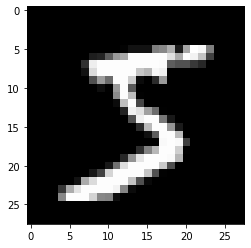

In [4]:
from matplotlib import pyplot
import numpy as np 

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

PyTorch uses `torch.tensor`, rather than numpy arrays, so we need to convert our data. 

In [5]:
import torch 
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)
